In [1]:
# nltk
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
from nltk import FreqDist

# Preprocessing
import re
import string
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
import pandas as pd
import numpy as np
import os

# Modeling
from sklearn.model_selection import KFold, cross_val_score, GridSearchCV 
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from imblearn.over_sampling import SMOTE
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, plot_confusion_matrix
from sklearn.pipeline import Pipeline
from gensim.models.doc2vec import Doc2Vec, TaggedDocument

# Keras
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import *

# Plotting
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#Wordcloud
from wordcloud import WordCloud, STOPWORDS 

#Pillow
from PIL import Image
import re

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
Using TensorFlow backend.
/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
## To display  all the interactive output without using the print function
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [3]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [4]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import csv
import sys
import pandas as pd
df = pd.read_csv('/content/drive/My Drive/workvisa1.csv', encoding= 'ISO-8859-1')


nltk.download('vader_lexicon')
df.head()


/usr/local/lib/python3.6/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

,Tweet Id,tweet,label
0,1.280000e+18,"RT @behindwoods : #TCS, #Infosys and #TechMahi...",0.0
1,1.280000e+18,"#TCS, #Infosys and #TechMahindra come up with ...",0.0
2,1.280000e+18,RT @MarkSKrikorian : .@realDonaldTrump is the ...,1.0
3,1.280000e+18,RT @UpskillC : #Skills trump college degree. ...,0.0
4,1.280000e+18,"#Skills trump college degree. ""President Dona...",0.0


In [5]:
# Checking null data 
df.isnull().sum()

Tweet Id    0
tweet       0
label       1
dtype: int64

In [6]:

df.info()
df['label'].value_counts()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7210 entries, 0 to 7209
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Tweet Id  7210 non-null   float64
 1   tweet     7210 non-null   object 
 2   label     7209 non-null   float64
dtypes: float64(2), object(1)
memory usage: 169.1+ KB


-1.0    4238
 1.0    2109
 0.0     862
Name: label, dtype: int64

In [7]:
# drop unneeded column
df=df.drop(columns=['Tweet Id'])

In [8]:
# Convert "tweet" data into string format.

df["tweet"]= df["tweet"].astype(str) 

In [9]:
# Converting labeles to object
df['label1'] = df['label'].astype('str')
df['label1'] = df['label1'].apply(lambda x: x.strip().replace("1.0", "positive").replace("0.0", "neutral").replace("-1.0","negative"))
df.head(50)

,tweet,label,label1
0,"RT @behindwoods : #TCS, #Infosys and #TechMahi...",0.0,neutral
1,"#TCS, #Infosys and #TechMahindra come up with ...",0.0,neutral
2,RT @MarkSKrikorian : .@realDonaldTrump is the ...,1.0,positive
3,RT @UpskillC : #Skills trump college degree. ...,0.0,neutral
4,"#Skills trump college degree. ""President Dona...",0.0,neutral
5,RT natlawreview: Update: Implementation of Jun...,0.0,neutral
6,"RT @orfonline : Suspension of #H1B Ñ India, in...",0.0,neutral
7,RT @AmWorkCo : Thank YOU _@realDonaldTrump_ fo...,1.0,positive
8,"Suspension of #H1B Ñ India, in all likelihood,...",0.0,neutral
9,RT @AmWorkCo : We hope &amp; pray that @realDo...,1.0,positive


In [10]:
# Define sentiment analaysis function to help with labeling tweets
def sentimentanlayze(tweet):
  '''  function to label tweets into positive or negative or neutral 
      through feeding it with list of positive word and list of 
      negative words and by using a regex compiler to create a pattern of 
      positive, negarive, and neutral words and piping the words to search 
      in all tweets '''
  
  
  # my positive list of words
  postive=[
"diversity",
"#blacklivesmatter",
"#blm",
"ernestMEdsel1",
"telugu",
"scam",
"stealing",
"visa reform",
"vbierschwale",
"denied",
"deny ",
#"american",
#"americans",
"greedy",
"support trump",
"#americafirst",
"outsourcing",
"college grads",
"david_j_bier",
"reduce h1b visas",
"american jobs",
"end h1bvisa",
"cheap",
"endh1",
"end h1b",
"denying",
"ends386",
"cocacha31775669",
"wcwoa",
"illegal",
"parasite",
"stops386",
"ivankatrump",
"expandtheban",
"thank you",
"frankdc17",
"@amworkco",
"amworkco",
"leader",
" overwork",
"#bigtech",
"pray",
"#nepotism",
"@wcwoa",
"fighting",
"foreigners",
"first president",
"@CommerceGov",
"screwing",
"do not like",
"replacements",
"displacing"
"merit",
"cursed "
"potus",
"add thousands"
]

# my negative list of words
  negative=[
"skilled",
"children",
"family",
"herretostay",
"moratorium",
"orange man",
"dissapointed",
"suicide",
"blocking" ,
"savej1",
"s386isfair",
"sanjeev93882222",
"cesifoti",
"alicegwells",
"attract",
"american dream",
"process easier",
"easier process",
"dwhiteheadsel",
"hurt",
"innovation",
"liberty_immigrn",
"sick"
 "moratorium",
 "@wjraghu", 
 "wrong direction"
 "trumpÕs",
"@fwdus",
"please",
"exceptional",
"#training"
,"@liberty_immigrn",
"@wjraghu",
"hardworking",
 "#PassS386"
]
  a = re.compile("("+"|" .join(postive)+")+", re.IGNORECASE) # create complier for the list of postive, to create pattern of all postive words 
  if len(a.findall(tweet))>0: # check in tweet with using the complier
    return 1
  a = re.compile("("+"|" .join(negative)+")+", re.IGNORECASE) #|  means 'or ' in regular expression 
  if len(a.findall(tweet))>0:# word is included in the list
    return -1
  return 0


In [11]:
# applying my function on tweets and creating new labeled values

df['new_label']=[sentimentanlayze(x) for x in list(df["tweet"])] 

In [12]:
# cleaning using regex

df["new_tweet"] = [re.sub('[^\w 0-9@#\.]', "", x) for x in list(df['tweet'])]# removing any character other than in the list, sub used for replacing the pattern which is first argument, with diffirent value i.e. second argument'' 
# third argument is the tweet in the function ,\.  means that this dot is  not command through adding "\" to it  which make it regular character

In [13]:
# cleaning using regex
# removing any character other than in the list
df["new_tweet"] = [re.sub(' http:| https:|^RT |httpst|will|amp|the', "", x) for x in list(df['new_tweet'])] # sub used for replacing the pattern which is first argument, with diffirent value i.e. second argument'' 
# third argument is the tweet in the function 

In [14]:
re.sub('http:| https:|^RT |httpst ', " ", df["new_tweet"][0])# removing http, https,RT and replace with space ,^RT means if it is begining of tweet

'@behindwoods  #TCS #Infosys and #TechMahindra come up with solutions to tackle #H1B #VisaBan#businesses #Jobs .coXrIgtJuHhR'

In [15]:
re.sub('[^\w 0-9@#\.]', "", df["new_tweet"][0])

'@behindwoods  #TCS #Infosys and #TechMahindra come up with solutions to tackle #H1B #VisaBan#businesses #Jobs .coXrIgtJuHhR'

In [16]:
# Perform Data Cleaning from the Stop words
import nltk # Natural Language Toolkit (NLTK)
nltk.download('stopwords')
# download the stopword package in English Language
from nltk.corpus import stopwords
#stopwords.words('english')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [17]:
# Create a pipeline to remove stop-words, punctuation, and perform tokenization
#def message_cleaning(message):
 # ''' pipeline function performs the follwoing:
 # (1) remove punctiation,
  #(2) remove stopwords'''


 # Test_punc_removed=[char for char in message if char not in string.punctuation]
  #Test_punc_removed_join=''.join(Test_punc_removed)
  #Test_punc_removed_join_clean=[word for word in Test_punc_removed_join.split() if word.lower() not in stopwords.words('english') ]
  #return Test_punc_removed_join_clean

In [18]:
# let's test the newly added function
#df_clean=df['new_tweet'].apply(message_cleaning)
#df_clean.head()
#print(df_clean[5]) # cleaning tweet in index 5

In [19]:
# Plot the word cloud
! pip install wordcloud
from wordcloud import WordCloud 
# convert all  the tweets into a list 
sentences=df['new_tweet'].tolist()
# join all the sentences i.e. combining all the tweets in one massive string
sentences_as_one_string= " ".join(sentences) # join all data

<Figure size 1440x1440 with 0 Axes>

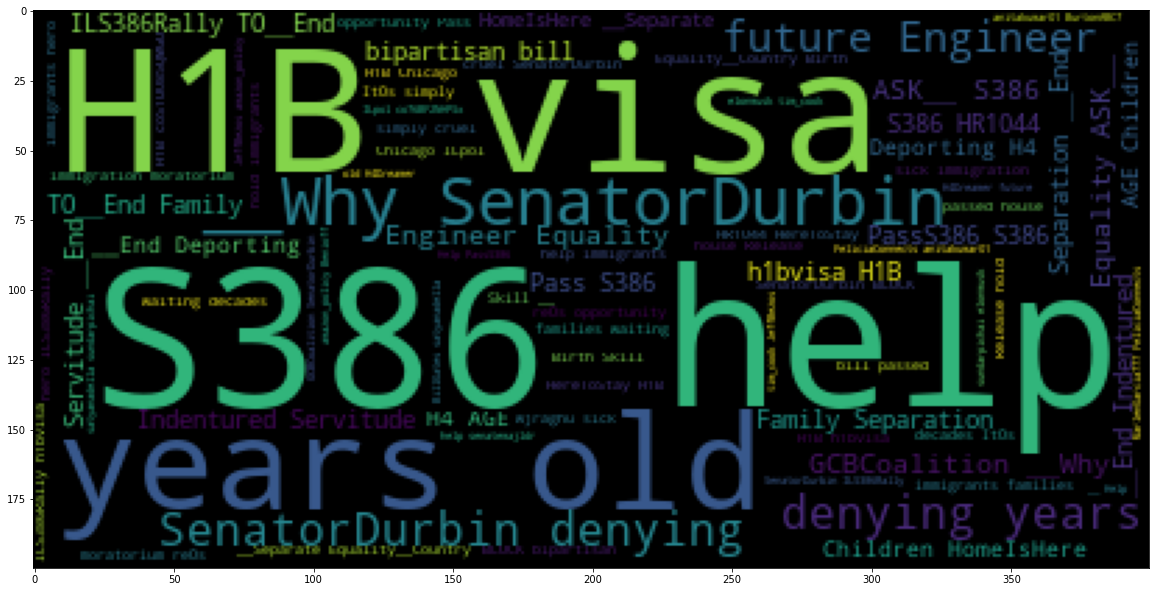

In [20]:
# visualize negative cloud, convert negative tweets to a list
negatives = df[df.label == -1]
negative_list=negatives['new_tweet'].tolist()
# join the list of tweets into a mssive string
negative_sentences_as_one_string=" ".join(negative_list)
plt.figure(figsize=(20,20))
plt.imshow(WordCloud().generate(negative_sentences_as_one_string))


<Figure size 1440x1440 with 0 Axes>

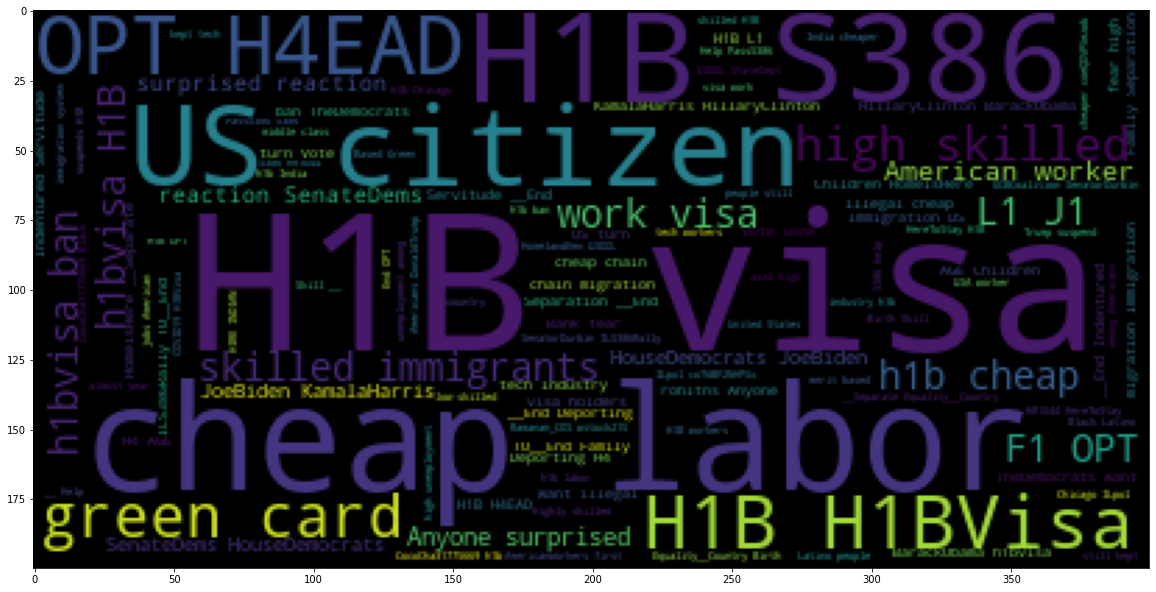

In [21]:
# visualize positive cloud, convert positive tweets to a list
positives = df [df.label == 1]
positive_list=positives['new_tweet'].tolist()
# join the list of tweets into a mssive string
positive_sentences_as_one_string=" ".join(positive_list)
plt.figure(figsize=(20,20))
plt.imshow(WordCloud().generate(positive_sentences_as_one_string))


In [22]:
df[50:100]

,tweet,label,label1,new_label,new_tweet
50,1. From @BLaw - Some of the Federal Government...,1.0,positive,1,1. From @BLaw Some of Federal Government age...
51,RT @VipinMahajan : What happens when we #PassS...,-1.0,-positive,-1,@VipinMahajan What happens when we #PassS386 ...
52,RT @wjraghu : With the sick immigration morato...,-1.0,-positive,-1,@wjraghu With sick immigration moratorium re...
53,RT @FrankDC17 : ____should NOT fight between:\...,1.0,positive,1,@FrankDC17 ____should NOT fight betweenDemocr...
54,RT @CocoCha31775669 : According to Census Bure...,1.0,positive,1,@CocoCha31775669 According to Census Bureau d...
55,"""It's incredibly important to"" #AmericanWorker...",1.0,positive,1,Its incredibly important to #AmericanWorkers t...
56,RT @CocoCha31775669 : The power of people!!! W...,1.0,positive,1,@CocoCha31775669 The power of people We fough...
57,RT @CocoCha31775669 : Innovation does not depe...,1.0,positive,1,@CocoCha31775669 Innovation does not depend o...
58,RT @rebaliza4 : https://t.co/sln4pitzou y DOES...,1.0,positive,1,@rebaliza4 .cosln4pitzou y DOES @Microsoft O...
59,RT @anil_am22 : You can work remotely from Ind...,0.0,neutral,0,@anil_am22 You can work remotely from India o...


In [23]:
df['new_tweet'][99]

'I want @realDonaldTrump to be reelected as POTUS Orwise who  teach a lesson and apply burnol to #NRI bhakths. #H1B #ImmigrationBill #ModiSurrendersToChina'

In [24]:
# showing the lenght of each tweet based on number of characters
# to get the length of every tweet
df['length']=df['new_tweet'].apply(len)
df

,tweet,label,label1,new_label,new_tweet,length
0,"RT @behindwoods : #TCS, #Infosys and #TechMahi...",0.0,neutral,0,@behindwoods #TCS #Infosys and #TechMahindra ...,123
1,"#TCS, #Infosys and #TechMahindra come up with ...",0.0,neutral,0,#TCS #Infosys and #TechMahindra come up with s...,109
2,RT @MarkSKrikorian : .@realDonaldTrump is the ...,1.0,positive,1,@MarkSKrikorian .@realDonaldTrump is first p...,162
3,RT @UpskillC : #Skills trump college degree. ...,0.0,neutral,0,@UpskillC #Skills trump college degree. Pres...,272
4,"#Skills trump college degree. ""President Dona...",0.0,neutral,0,#Skills trump college degree. President Donal...,261
...,...,...,...,...,...,...
7205,FACTBOX: President Donald Trump suspended the ...,-1.0,-positive,0,FACTBOX President Donald Trump suspended entr...,266
7206,RT @CR7Ayush07 : I love this confidence!__\nSu...,-1.0,-positive,0,@CR7Ayush07 I love this confidence__Sundar Pi...,73
7207,FACTBOX: President Donald Trump suspended the ...,-1.0,-positive,0,FACTBOX President Donald Trump suspended entr...,212
7208,RT @WCWOA : @beringorca @NHtex @JessicaV_CIS A...,1.0,positive,1,@WCWOA @beringorca @NHtex @JessicaV_CIS Add ...,203


In [25]:
# drop unneeded column
df=df.drop(columns=['tweet'])
df.head()

,label,label1,new_label,new_tweet,length
0,0.0,neutral,0,@behindwoods #TCS #Infosys and #TechMahindra ...,123
1,0.0,neutral,0,#TCS #Infosys and #TechMahindra come up with s...,109
2,1.0,positive,1,@MarkSKrikorian .@realDonaldTrump is first p...,162
3,0.0,neutral,0,@UpskillC #Skills trump college degree. Pres...,272
4,0.0,neutral,0,#Skills trump college degree. President Donal...,261


In [26]:
df.rename(columns = {'new_tweet':'tweet','label':'origin_label'}, inplace = True) 
df.tail(50)
   

,origin_label,label1,new_label,tweet,length
7160,-1.0,-positive,0,@Akshobh As #ExecutiveOrder cls down on iss...,283
7161,1.0,positive,0,President Trumps latest Proclamation suspends ...,228
7162,-1.0,-positive,0,Around 1000 people stuck in India are in vario...,287
7163,-1.0,-positive,0,H1 B visa Temporary Ban by President Trump. #...,249
7164,-1.0,-positive,0,@Ssskl_India The cancellation of H1B visas is...,289
7165,-1.0,-positive,0,The cancellation of H1B visas is anor major bl...,275
7166,-1.0,-positive,1,@rohitns Anyone else surprised at no reaction...,284
7167,-1.0,-positive,0,@Akshobh As #ExecutiveOrder cls down on iss...,283
7168,1.0,positive,1,@phsaravanan @SenatorDurbin @BillPascrell @Re...,323
7169,-1.0,-positive,0,Inspired infotech 247 Expert CloudDevopsCitrix...,248


In [28]:
df['tweet'][7207]

'FACTBOX President Donald Trump suspended  entry of certain foreign workers until  end of  year. HereÕs a look at who is affected by  new rules on work visas.#h1b #h1bvisa #h1bvisaprocess #h4 #h4eadÉ .coz2qvRLajOk'